# 🐶 Classify Different Dog Breeds

In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the [Kaggle dog breed identification competition](https://www.kaggle.com/c/dog-breed-identification/overview). It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

We're going to go through the following TensorFlow/Deep Learning workflow:
1. Get data ready (download from Kaggle, store, import).
2. Prepare the data (preprocessing, the 3 sets, X & y).
3. Choose and fit/train a model ([TensorFlow Hub](https://www.tensorflow.org/hub), `tf.keras.applications`, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).
4. Evaluating a model (making predictions, comparing them with the ground truth labels).
5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
6. Save, sharing and reloading your model (once we're happy with the results).

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub. 

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YES!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.7.0
Hub version: 0.12.0
GPU available (YES!)


## Getting the data

For this project, I've [downloaded the data from Kaggle](https://www.kaggle.com/c/dog-breed-identification/data).


In [2]:
import pandas as pd
labels_csv = pd.read_csv("Data/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [3]:
# How many images are there of each breed?
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

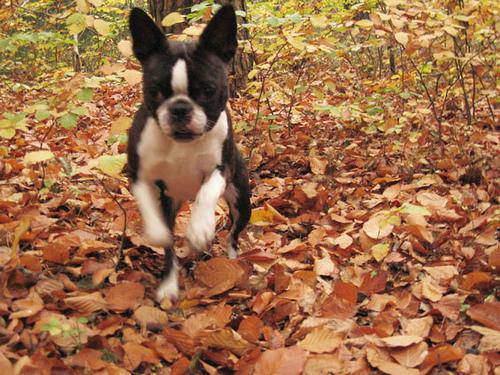

In [4]:
# checking the images
from IPython.display import display, Image
Image("Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

Since we've got the image ID's and their labels in a DataFrame (`labels_csv`), we'll use it to create:
* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [5]:
# Create pathnames from image ID's
filenames = ["Data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [6]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("Data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


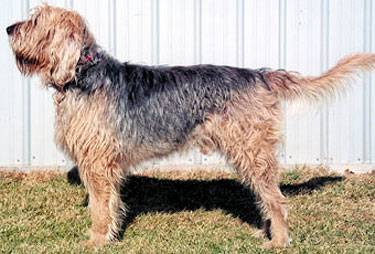

In [8]:
# Check an image directly from a filepath
Image(filenames[500])

In [9]:
import numpy as np
labels = np.array(labels_csv['breed'])
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [11]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


Finally, since a machine learning model can't take strings as input (what `labels` currently is), we'll have to convert our labels to numbers. 

To begin with, we'll find all of the unique dog breed names.

Then we'll go through the list of `labels` and compare them to unique breeds and create a list of booleans indicating which one is the real label (`True`) and which ones aren't (`False`).

### one hot encoding

In [12]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
# use comparison to create boolean array
(labels[0] == unique_breeds).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Turn every label into a boolean array
boolean_labels = [(label == np.array(unique_breeds)).astype(int) for label in labels]
boolean_labels[:2]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

### Splitting the data

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function or we could simply make manual splits of the data.

In [45]:
# Setup X & y variables
X = filenames
y = boolean_labels

# Set number of images to use for experimenting
NUM_IMAGES = 1000

In [46]:
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## Preprocessing images (turning images into Tensors)

Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpeg file) into Tensors.
4. Resize the `image` to be of shape (224, 224) which will be our input shape for the model.
5. Return the modified `image`.

(257, 350, 3)


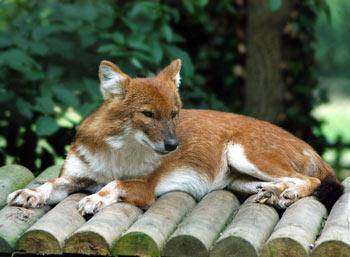

In [47]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
print(image.shape)
Image(filenames[42])

In [48]:
#convert image to a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [49]:
# Define image size
IMG_SIZE = 224

#function for preprocessing images 
def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

### Creating data batches

Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow [`BatchDataset`](https://www.tensorflow.org/guide/data#batching_dataset_elements)).

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of `process_image` function at the same time.

In [50]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32.

In [43]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # create tensorflow dataset from the tensor_slices which is (x) >> only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE) # split (data) into batches of a number of (BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [52]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [53]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)))

## Visualizing the data batches

In [54]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the [`as_numpy_iterator()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator) method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to [`next()`](https://docs.python.org/3/library/functions.html#next) will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

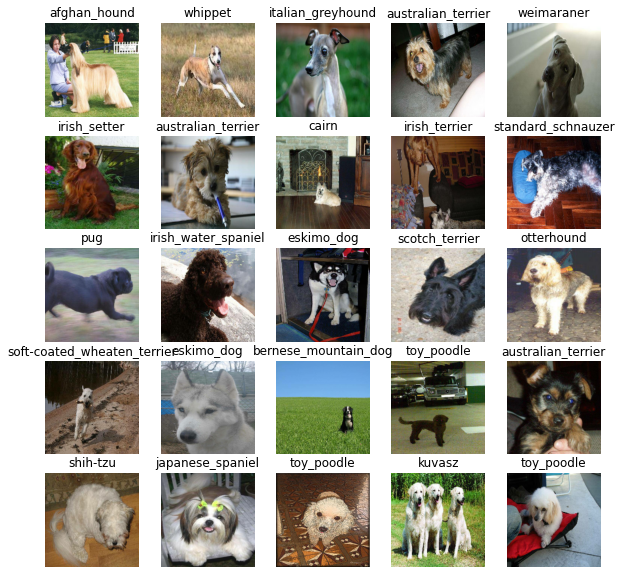

In [60]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# Creating and training a model

Now our data is ready, let's prepare it modelling. We'll use an existing model from [TensorFlow Hub](https://tfhub.dev/).

For the [mobilenet_v2_130_224](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5) model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

### Building a model

Before we build a model, there are a few things we need to define:
* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

In [62]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

let's create a function which:
* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion.
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [63]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"])

  # Build the model
  model.build(INPUT_SHAPE)
  
  return model

In [66]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

#### TensorBoard Callback

[TensorBoard](https://www.tensorflow.org/tensorboard/get_started) helps provide a visual way to monitor the progress of your model during and after training.

It can be used [directly in a notebook](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks) to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize the our models training logs using the `%tensorboard` magic function (we'll do this later on).

In [69]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [70]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback

[Early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

In [71]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

### Training a model (on a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

Let's create a simple function which trains a model. The function will:
* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback()` (we do this here so it creates a log directory of the current date and time).
* Call the `fit()` function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [72]:
# Build a function to train and return a trained model
def train_model(NUM_EPOCHS=10):
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [73]:
# Fit the model to the data
model = train_model(NUM_EPOCHS=100)

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 53s 420ms/step - loss: 4.5749 - accuracy: 0.1112 - val_loss: 3.4076 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 7s 284ms/step - loss: 1.6432 - accuracy: 0.7088 - val_loss: 2.1483 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 7s 287ms/step - loss: 0.5813 - accuracy: 0.9312 - val_loss: 1.6409 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 7s 271ms/step - loss: 0.2559 - accuracy: 0.9862 - val_loss: 1.4485 - val_accuracy: 0.6600
Epoch 5/100
25/25 [==============================] - 7s 274ms/step - loss: 0.1498 - accuracy: 0.9962 - val_loss: 1.3733 - val_accuracy: 0.6750
Epoch 6/100
25/25 [==============================] - 7s 275ms/step - loss: 0.1015 - accuracy: 0.9987 - val_loss: 1.3468 - val_accuracy: 0.6700
Epoch 7/100
25/25 [=============================

#### Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

In [77]:
%tensorboard --logdir Data/logs

Reusing TensorBoard on port 6006 (pid 468), started 0:07:19 ago. (Use '!kill 468' to kill it.)

Thanks to our `early_stopping` callback, the model stopped training after 26 or so epochs (in my case, yours might be slightly different). This is because the validation accuracy failed to improve for 3 epochs.

## Making and evaluating predictions using a trained model

In [79]:
# Make predictions on the validation data
predictions = model.predict(val_data)
predictions

array([[6.86673447e-04, 5.60392837e-05, 1.74641595e-04, ...,
        4.16952476e-04, 6.87804932e-05, 3.37273162e-03],
       [4.37286399e-05, 1.42629651e-04, 3.56501492e-04, ...,
        6.69483779e-05, 1.18037606e-04, 2.81692814e-06],
       [2.89725517e-06, 3.72626564e-05, 6.43752458e-07, ...,
        7.98459405e-06, 2.99050407e-06, 2.21547045e-04],
       ...,
       [3.41833288e-06, 4.74876724e-05, 6.96751958e-05, ...,
        1.08288714e-05, 3.99417513e-05, 1.80244344e-04],
       [6.48638699e-04, 1.43419238e-04, 1.15883822e-05, ...,
        6.41378720e-05, 1.20475979e-05, 8.21780879e-04],
       [1.45103270e-03, 3.55538941e-06, 9.21459054e-04, ...,
        3.73817305e-03, 3.09562660e-04, 1.51804225e-05]], dtype=float32)

In [80]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[6.86673447e-04 5.60392837e-05 1.74641595e-04 8.79427389e-05
 2.74468039e-04 1.62352553e-05 1.64615065e-02 4.03613085e-04
 3.45283224e-05 6.14174700e-04 1.25236256e-04 4.99271482e-05
 2.66709889e-04 5.83043184e-05 5.94396406e-05 3.59495985e-04
 5.78327708e-05 3.13808858e-01 2.71361423e-05 1.23797754e-05
 3.82938917e-04 4.12339759e-05 1.20294699e-05 1.10113516e-03
 6.95807421e-06 7.57219241e-05 1.20595030e-01 1.01016172e-04
 4.16108582e-04 8.01395508e-05 6.44689644e-05 3.48286191e-03
 6.28392387e-04 4.68069484e-05 1.18006414e-04 4.79024276e-02
 1.70639960e-05 2.37487533e-04 1.61420146e-04 2.80812874e-05
 3.55330791e-04 1.10924659e-04 4.12450645e-05 5.00261376e-04
 4.15946488e-05 7.12131732e-05 4.49949584e-05 1.50402222e-04
 1.18733233e-05 2.93163292e-04 2.08512618e-04 4.17609845e-05
 1.01865451e-04 1.76840822e-05 1.22929807e-04 6.07756738e-05
 1.86786725e-04 3.56633472e-03 1.83675918e-04 7.82187954e-02
 5.08194571e-05 5.20358190e-05 7.56712572e-04 1.67811577e-05
 5.81286033e-04 4.734951

let's build a little function to convert prediction probabilities into predicted labels.

In [81]:
# Turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using [`unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch)) and then turn it into an iterator using [`as_numpy_iterator()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator).

Let's make a function to do so.

In [82]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [97]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

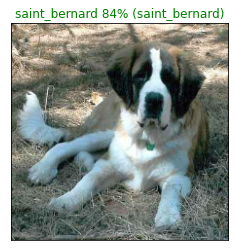

In [98]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=8)

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:
* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using `get_pred_label()`.
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [106]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

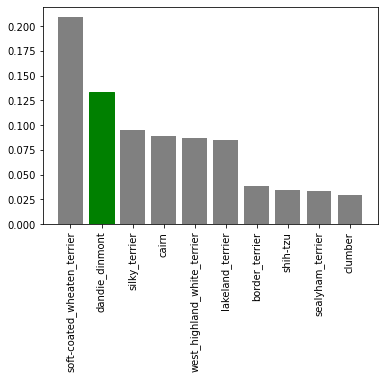

In [107]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=65)

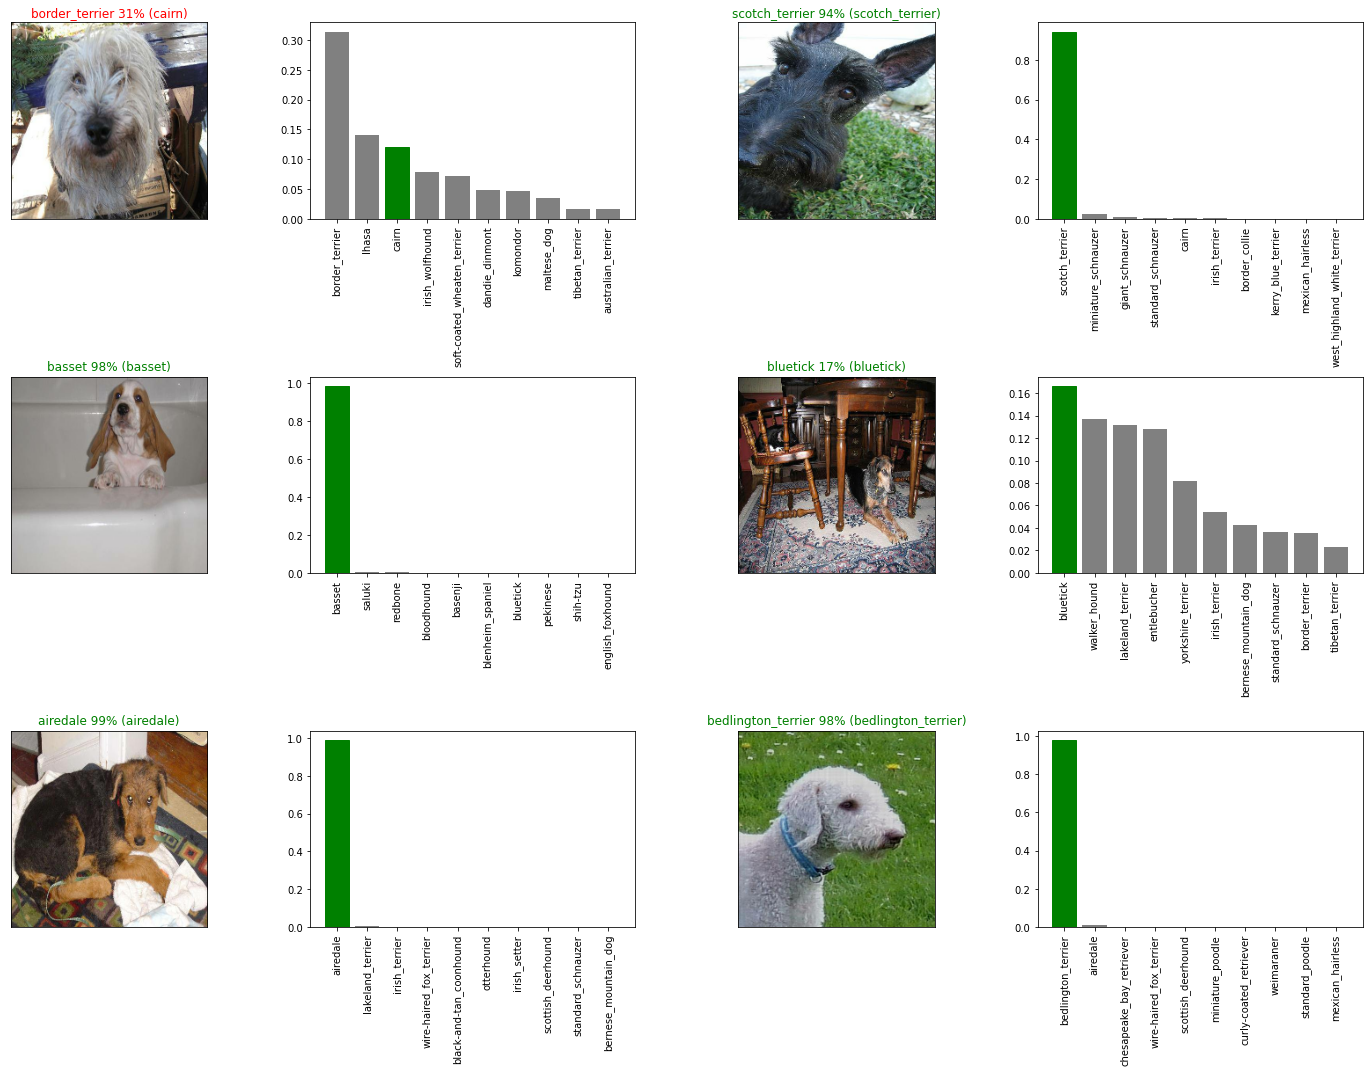

In [112]:
# check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

The format of an [entire saved Keras model is h5](https://www.tensorflow.org/tutorials/keras/save_and_load). So we'll make a function which can take a model as input and utilise the [`save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) method to save it as a h5 file to a specified directory.

In [120]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the [`tf.keras.models.load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) function to load it into the notebook.

Because we're using a component from TensorFlow Hub (`hub.KerasLayer`) we'll have to pass this as a parameter to the `custom_objects` parameter.

In [118]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [121]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: Data/models\20211230-105219-1000-images-Adam.h5...


'Data/models\\20211230-105219-1000-images-Adam.h5'

In [125]:
# Load our model trained on 1000 images
model_1000_images = load_model('Data/models/20211230-105219-1000-images-Adam.h5')

Loading saved model from: Data/models/20211230-105219-1000-images-Adam.h5


## Training a model (on the full data)

In [126]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [127]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [128]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [130]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=100,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 118s 321ms/step - loss: 1.3296 - accuracy: 0.6720
Epoch 2/100
320/320 [==============================] - 71s 223ms/step - loss: 0.3995 - accuracy: 0.8848
Epoch 3/100
320/320 [==============================] - 71s 222ms/step - loss: 0.2393 - accuracy: 0.9368
Epoch 4/100
320/320 [==============================] - 70s 217ms/step - loss: 0.1531 - accuracy: 0.9625
Epoch 5/100
320/320 [==============================] - 68s 214ms/step - loss: 0.1066 - accuracy: 0.9792
Epoch 6/100
320/320 [==============================] - 69s 217ms/step - loss: 0.0783 - accuracy: 0.9850
Epoch 7/100
320/320 [==============================] - 81s 252ms/step - loss: 0.0581 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 64s 200ms/step - loss: 0.0464 - accuracy: 0.9946
Epoch 9/100
320/320 [==============================] - 66s 207ms/step - loss: 0.0366 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 67s 208

In [131]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: Data/models\20211230-113823-all-images-Adam.h5...


'Data/models\\20211230-113823-all-images-Adam.h5'

## Making predictions on the test dataset

To make predictions on the test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the `predict()` function.

In [132]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "Data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['Data/test/000621fb3cbb32d8935728e48679680e.jpg',
 'Data/test/00102ee9d8eb90812350685311fe5890.jpg',
 'Data/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'Data/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'Data/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'Data/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'Data/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'Data/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'Data/test/002f80396f1e3db687c5932d7978b196.jpg',
 'Data/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [133]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [134]:
# Make predictions on test data batch using the loaded full model
test_predictions = full_model.predict(test_data)

### Preparing test dataset predictions for Kaggle

Looking at the [Kaggle sample submission](https://www.kaggle.com/c/dog-breed-identification/overview/evaluation), it looks like they want the models output probabilities each for label along with the image ID's.

To get the data in this format, we'll:
*   Create a pandas DataFrame with an ID column as well as a column for each dog breed.
*   Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the `unique_breeds` list and the `test_predictions` list.
* Export the DataFrame as a CSV to submit it to Kaggle.


In [137]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [139]:
# Append test image ID's to predictions DataFrame
test_path = "Data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   7.492265e-12  7.078018e-12   
1  00102ee9d8eb90812350685311fe5890   1.165272e-06  4.923737e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   6.922401e-10  1.784468e-06   
3  001510bc8570bbeee98c8d80c8a95ec1   1.721752e-05  2.403743e-06   
4  001a5f3114548acdefa3d4da05474c2e   1.075647e-04  8.343432e-06   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.681534e-14  5.734048e-14                    9.746040e-14   
1         1.752128e-07  1.157365e-09                    1.664251e-06   
2         1.014999e-08  1.035323e-09                    1.056463e-09   
3         4.479933e-07  3.378859e-05                    1.111462e-04   
4         2.891021e-08  2.224118e-09                    2.471900e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.148610e-12        4.136556e-16  1.404442e-13  7.043145e-14  ...   
1  3.925629e-08        8.395375e-07  7.736587e-07  5.072986e-08  ...   
2  8.613433e-08        1.126191e-10  7.809515e-11  2.270583e-08  ...   
3  3.374069e-06        2.554236e-10  8.371273e-08  2.424873e-07  ...   
4  3.575094e-11        6.063294e-10  2.972187e-09  3.813345e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.911979e-13  3.575868e-14  3.340184e-14  5.311750e-15  3.340465e-14   
1  3.822482e-08  8.267565e-07  1.346245e-08  4.175604e-06  5.113633e-08   
2  2.690329e-11  3.040737e-11  4.063592e-07  8.084361e-06  2.118689e-07   
3  6.290331e-06  1.280591e-09  2.853647e-06  3.950772e-09  2.723018e-06   
4  6.965236e-07  2.524618e-10  1.162718e-10  9.069532e-11  1.997839e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            8.838706e-13                 1.870311e-13  6.360938e-14   
1            1.076221e-07                 5.870334e-04  1.302407e-10   
2            1.831359e-07                 1.842943e-11  4.501154e-07   
3            3.477884e-08                 9.078345e-14  8.127932e-03   
4            1.395528e-09                 1.250198e-10  3.882881e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.636092e-10       3.843251e-11  
1             1.704851e-07       2.945902e-09  
2             5.260632e-10       1.738519e-10  
3             1.533264e-09       3.474914e-06  
4             1.432753e-09       1.905723e-07  

[5 rows x 121 columns]

In [140]:
# export our predictions DataFrame to CSV so we can submit it to Kaggle
preds_df.to_csv("Data/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

## Making predictions on custom images

To do so, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [152]:
# Get custom image filepaths
custom_path = "Data/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [153]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [154]:
# Make predictions on the custom data
custom_preds = full_model.predict(custom_data)

In [155]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['bouvier_des_flandres', 'basenji', 'basenji']

In [156]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

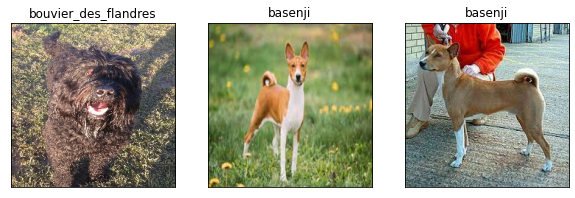

In [157]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)